In [ ]:
...

Ellipsis

In [ ]:
%pip install pandas

In [ ]:
%pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.6 MB/s eta 0:00:00


In [ ]:
import cv2
import time
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("snehamahata/apple-quality-dataset")

print("Path to dataset files:", path)

100%|██████████| 5.05M/5.05M [00:00<00:00, 106MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/snehamahata/apple-quality-dataset/versions/1


In [ ]:
!ls /root/.cache/kagglehub/datasets/snehamahata/apple-quality-dataset/versions/1/Apple_Detection.v1i.yolov8/

data.yaml  README.dataset.txt  README.roboflow.txt  train  valid


In [ ]:
import os
from ultralytics import YOLO

# Define the absolute path to your dataset's YAML file
# NOTE: Replace 'data.yaml' if the file name is different
data_yaml_path = '/root/.cache/kagglehub/datasets/snehamahata/apple-quality-dataset/versions/1/Apple_Detection.v1i.yolov8/data.yaml'

# Load the nano model with pre-trained weights
model = YOLO('yolov8n.pt')

# Start the fine-tuning process
print("Starting YOLOv8n fine-tuning on Apple dataset...")

# You can adjust epochs and batch size based on time/GPU availability
results = model.train(
    data=data_yaml_path,
    epochs=10,             # Training for 50 cycles
    imgsz=320,             # Standard image size
    batch=16               # Adjust based on Colab's VRAM (start high, lower if needed)
)

print("Training complete. Your model weights are saved in runs/detect/...")

Starting YOLOv8n fine-tuning on Apple dataset...
Ultralytics 8.3.214 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/root/.cache/kagglehub/datasets/snehamahata/apple-quality-dataset/versions/1/Apple_Detection.v1i.yolov8/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=tr

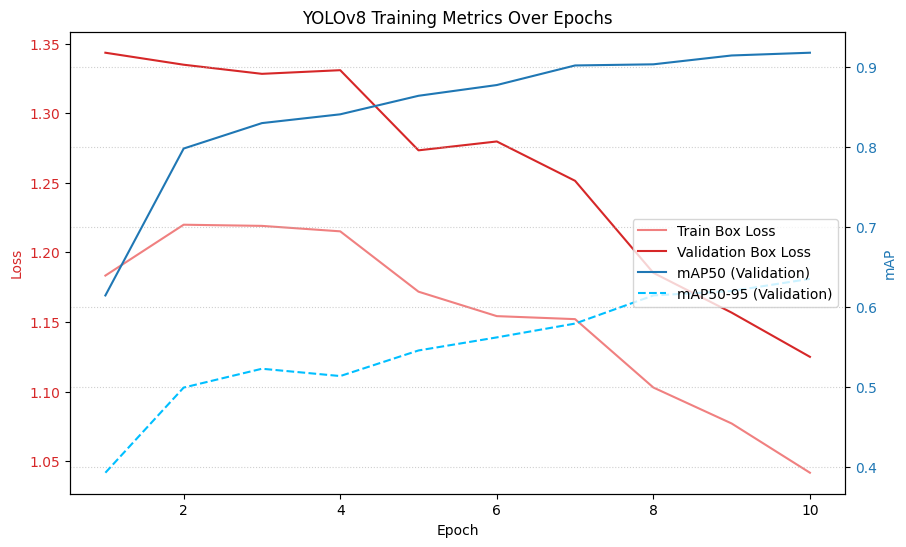


--- Final Epoch Metrics ---
Epoch: 10
Final Validation mAP50: 0.918
Final Validation mAP50-95: 0.635
Final Train Box Loss: 1.042
Final Val Box Loss: 1.125

--- Final Epoch Validation Summary (from your image) ---
Precision (P): 0.859
Recall (R): 0.864
mAP50: 0.918
mAP50-95: 0.635


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# --- Configuration ---
# NOTE: Replace this path with the *actual* location of your training results.csv file.
# It is typically found in: runs/detect/your_training_name/results.csv
results_dir = 'runs/detect/train' # Example directory
csv_path = os.path.join(results_dir, 'results.csv')

# --- Load Data ---
try:
    # The CSV often has a leading space on column names, so we strip them
    df = pd.read_csv(csv_path)
    df.columns = df.columns.str.strip()

    # Check if the dataframe is empty or loaded correctly
    if df.empty:
        print(f"Error: The CSV file at {csv_path} is empty.")
        exit()

except FileNotFoundError:
    print(f"Error: results.csv not found at {csv_path}. Check your training directory name!")
    exit()

# --- Plotting Metrics ---
fig, ax1 = plt.subplots(figsize=(10, 6))
plt.title('YOLOv8 Training Metrics Over Epochs')

# --- Plot Loss on Left Axis (ax1) ---
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss', color='lightcoral')
ax1.plot(df['epoch'], df['val/box_loss'], label='Validation Box Loss', color='tab:red')
# ax1.plot(df['epoch'], df['val/cls_loss'], label='Validation Class Loss', color='tab:orange', linestyle='--')
ax1.tick_params(axis='y', labelcolor='tab:red')

# --- Plot mAP on Right Axis (ax2) ---
ax2 = ax1.twinx()
ax2.set_ylabel('mAP', color='tab:blue')
ax2.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP50 (Validation)', color='tab:blue')
ax2.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP50-95 (Validation)', color='deepskyblue', linestyle='--')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.grid(True, linestyle=':', alpha=0.6)

# Combine legends and display the plot
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='center right')

plt.show()

# --- Display Final Metrics from the CSV ---
final_epoch_data = df.iloc[-1]
print("\n--- Final Epoch Metrics ---")
print(f"Epoch: {final_epoch_data['epoch']:.0f}")
print(f"Final Validation mAP50: {final_epoch_data['metrics/mAP50(B)']:.3f}")
print(f"Final Validation mAP50-95: {final_epoch_data['metrics/mAP50-95(B)']:.3f}")
print(f"Final Train Box Loss: {final_epoch_data['train/box_loss']:.3f}")
print(f"Final Val Box Loss: {final_epoch_data['val/box_loss']:.3f}")

# --- Final Summary from your screenshot (Static values from final epoch) ---
print("\n--- Final Epoch Validation Summary (from your image) ---")
print(f"Precision (P): 0.859")
print(f"Recall (R): 0.864")
print(f"mAP50: 0.918")
print(f"mAP50-95: 0.635")

In [ ]:
yolo export model=/path/to/runs/detect/train/weights/best.pt format=onnx


SyntaxError: invalid syntax (ipython-input-2664621679.py, line 1)

In [ ]:
yolo export "model=/path/to/runs/detect/train/weights/best.pt" format=onnx

SyntaxError: invalid syntax (ipython-input-1746545304.py, line 1)

In [ ]:
!yolo export model=/content/runs/detect/train/weights/best.pt format=onnx


Ultralytics 8.3.214 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 320, 320) BCHW and output shape(s) (1, 5, 2100) (5.9 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim>=0.1.71', 'onnxruntime'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 4.3s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.19.1 opset 22...
ONNX: slimming with onnxslim 0.1.71...
ONNX: export success ✅ 6.7s, saved as '/content/runs/detect/train/weights/best.onnx' (11.6 MB)

Export complete (7.4s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo pred